# Ejercicio 1


![ejercicio1](fig/eje1.png)


En la figura se muestra un filtro sintonizado realizado con un inductor y un capacitor. El inductor tiene un $Q_{oL} = 50$ y suponga que el capacitor tiene $ESR\sim 0\Omega$. La fuente tiene una $P_{disp} = 500pW$ a $40MHz$. Se desea un $Q_c = 10$ para este circuito.

Para adaptar MTE con $Q_c = 10$ y el generador a $40MHz$:
1. Para máxima transferencia de energía a $Q$ constante, ¿ cual debe ser el valor de $R_L$?
2. Calcule $L_1$ 
3. Calcule $C_1$ .
4. Resistencia de perdidas paralelo $r_p$ del inductor
5. Calcule la impedancia de entrada del adaptador cargado a $f= 40 MHz$. 
6. La corriente pico del generador.
7. Calcule la potencia entrada al adaptador [dBm]
8. Calcule la potencia sobre la carga [dBm]
9. Perdidas del adaptador, valor porcentual.
10. Verificar utilizando simuladores.  


In [1]:
import numpy as np
from IPython.display import Image

Pdisp = 500e-12
Qc    = 10
Qo    = 50
fo    = 40e6
rg    = 50 


wo = 2*np.pi*fo

#1) 
RL = rg
print('1.1) RL= {:1.3f} ohms'.format(RL) )

#2) 
# Rext es la resistencia del generador y la carga en paralelo.
Rext = rg * RL / (rg + RL )

# Despejando L
L =  (1/Qc - 1/Qo)  * Rext / wo
print('1.2) L ={:2.2e} Hy'.format(L) ) 
#3) 
# Calculando C
C  =  1/ L / (wo)**2 
print('1.3) C ={:2.2e} F'.format(C) ) 

#4)
# La impedancia de entrada es la que "presenta" el circuito a la carga. 
rp =  Qo *(L * wo )
print('1.4) rp ={:2.2e} ohms'.format(rp) ) 

#5)
# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Rin = RL * rp / (RL + rp)
#Informo resultados
print('1.5) Rin= {:2.2f} ohms'.format(Rin) ) 

#6)
igpico = ((Pdisp*8)/rg)**0.5
print('1.6) igpico =  {:1.3e} A'.format(igpico) )

#7)
R     = Rin*rg/(Rin+rg)
vin   = (igpico*R)
Pin   = vin**2/(2*Rin)
print('1.7) Pin =  {:1.3e} dBm ({:1.2e} W)'.format(10*np.log10(Pin/1e-3), Pin ) )

#8)
# Calculo potencia sobre la carga
PRL = Pdisp*((1-Qc/Qo)**2)
# tambien
PRL = vin**2/(2*RL)
print('1.8) PRL =  {:1.3e} dBm ({:1.2e} W)'.format(10*np.log10(PRL/1e-3), PRL ) )

#9)
perdida = 1-  (PRL/Pdisp)
print('1.9) Perdida = {:2.2f} %'.format(perdida*100) ) 

perdida = 1 - (1-Qc/Qo)**2
print('1.9) Perdida = {:2.2f} %'.format(perdida*100) ) 



1.1) RL= 50.000 ohms
1.2) L =7.96e-09 Hy
1.3) C =1.99e-09 F
1.4) rp =1.00e+02 ohms
1.5) Rin= 33.33 ohms
1.6) igpico =  8.944e-06 A
1.7) Pin =  -6.319e+01 dBm (4.80e-10 W)
1.8) PRL =  -6.495e+01 dBm (3.20e-10 W)
1.9) Perdida = 36.00 %
1.9) Perdida = 36.00 %


# Ejercicio 2



![ejercicio2](fig/ejercicio2.png)


El circuito amplificador transistorizado sintonizado, el cual corresponde a la etapa de salida.
El transistor presenta una impedancia de salida $Z_{out} = 2500 \Omega - j 8000 \Omega$ a la frecuencia $f_o = 1 MHz$.  

La potencia disponible del transistor es de $P_{disp} = 100 mW$. 

La resistencia de carga es de $R_L = 100 \Omega$. 

Suponiendo que el capacitor de $C_1$ y el inductor $L_1$ tiene pérdidas despreciables.

Calcular para máxima transferencia de energía:
1. $L_1$
2. $C_1$ 
3. $Q_c$
4. $P_{R_L}$. Verificar utilizando simuladores.


El inductor $L_1$ disponible para el valor necesario presenta un factor de merito de $Q_o = 50$ a la frecuencia de trabajo.
5. El nuevo valor de $L_1$.
6. $C_1$ que sintoniza a $L_1$, tenga en cuenta la capacidad de salida del transistor. 
7. Nuevo $Q_c$.
8. $Z_{in}$ (la que se presenta a la resistencia del generador, incluyendo la capacidad de la salida del transistor, empleando los valores hallados en los puntos anteriores.  
9. $P_{R_L}$
10. Perdidas del adaptador. Verificar utilizando simuladores.


In [2]:
import numpy as np
from IPython.display import Image

fo    = 1e6
Zg    = 2500 - 1j*8000
Pdisp = 100e-3
Rl    = 100
wo    = 2*np.pi*fo
Qo    = 50

#1) 
# conversion Rg
Qm1 = abs(Zg.imag)/Zg.real

rgp = Zg.real*(1+Qm1**2)

xgp = Zg.imag*(1+1/Qm1**2)
cgp = -1/(xgp*wo)


# Conversion RL
Qm2 = ((rgp/Rl)-1)**0.5

Rlp = Rl*(1+Qm2**2)

xLs = Qm2*Rl  

Ls  = xLs/wo
print('1.1) L= {:1.3e} Hy'.format(Ls) )


#2) 
xLp = xLs*(1+1/Qm2**2)

xcp = -xLp
cp  = -1/(xcp*wo)
C   = cp-cgp

print('1.2) C ={:2.2e} F'.format(C) ) 

#3) 
rext = rgp*Rlp/(rgp+Rlp)
Qc   = rext/xLp
print('1.3) Qc ={:2.2f} (sin perdidas) '.format(Qc) ) 


#4)
PRl = Pdisp
print('1.4) PRL ={:2.2e} W'.format(PRl) ) 

#5)

# No cambia
print('1.5) L ={:2.2e} Hy'.format(Ls) ) 
#6) 
#no cambia
print('1.6) C ={:2.2e} F'.format(C) ) 

#7)

Qc = 1/(1/Qo+xLp/rext)

print('1.7) Qc ={:2.2f} (con perdidas) '.format(Qc) ) 

#8)

# La impedancia de entrada es la que "presenta" el circuito a la carga. 

rp  =  Qo *xLp 


# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Rin = Rlp * rp / (Rlp + rp)

print('1.8) Zin ={:2.2f}  '.format(Rin) ) 



#9)

# Calculo potencia sobre la carga
PRL = Pdisp*((1-Qc/Qo)**2)


print('1.9) PRL =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(PRL/1e-3), PRL ) )

#10)


perdida =1 -(1-Qc/Qo)**2
print('1.10) Perdida = {:2.2f} %'.format(perdida*100) ) 



1.1) L= 2.663e-04 Hy
1.2) C =7.67e-11 F
1.3) Qc =8.37 (sin perdidas) 
1.4) PRL =1.00e-01 W
1.5) L =2.66e-04 Hy
1.6) C =7.67e-11 F
1.7) Qc =7.17 (con perdidas) 
1.8) Zin =21053.99  
1.9) PRL =  1.87e+01 dBm (7.34e-02 W)
1.10) Perdida = 26.61 %


# Ejercicio 3

Se desea acoplar una antena para transmitir una señal de $f_o = 650 MHz$. Dicha antena presenta a la frecuencia de transmisión una impedancia de $Z_{ant} = 120 \Omega + j 10 \Omega$

![ejercicio1](fig/eje3opc.png)

Se quiere realizar el circuito de adaptación empleando dos componentes rectivos. Uno en serie y otro en derivación. 


Se dispone para ello algunos los inductores que se muestran el siguiente figura:

<img src="fig/ejercicio3L.png" width="300">

| codigo Inductor  |  valor  | 
|------------------|---------|
| L-15W2N7SV4E     |  2.7nHy |  
| L-15W3N9SV4E     |  3.9nHy |  
| L-15W10NJV4E     | 10.0nHy | 
| L-15W12NJV4E     | 12.0nHy |
| L-15W15NJV4E     | 15.0nHy |
| L-15W27NJV4E     | 27.0nHy |
| L-15W39NJV4E     | 39.0nHy |
| L-15WR10JV4E     | 100nHy  |
| L-15WR27JV4E     | 270nHy  |

El valor del factor de merito $Q_o$ se obtiene del gráfico, extrapolando para los valores que no esten disponibles. 

La corriente máxima para estos inductores es de $I_{Lmax} = 300 mA$

El transmisor tiene una impedancia de salida de $Z_g = 50 \Omega$ y se busca que el adaptador minimice las reflexiones en la linea. 

En base a los valores de inductores diponibles, calcular:
1. Defina que topologia cumple con los requisitos.
2. $L1$ para la topoligia de capacitor en serie, inductor derivación. 
3. $C1$ para ese mismo circuito. Verificar empleando la carta de Smith. 
4. $r_p$ del inductor.
5. Impedancia de entrada del adaptador incluyendo a la antena y las perdidas de los componentes. Para el capacitor suponga un factor de merito de $Qo =200$.
6.  Máxima potencia en la antena para no sobrepasar el limite de corriente del inductor. 
7. $i_g$ pico para lograr la máxima potencia en la antena. 
8. $P_{disp}$ del generador para la corriente calculada. 
9. Perdidas de inserción del adaptador. 
10. Tension sobre el capacitor. 



In [3]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# Datos 
Rl = 120
Xl = 10
Zl = Rl + 1j*Xl
rg = 50
fo = 650e6
wo = 2*np.pi*fo


Qm   = Xl/Rl
Rlp  = Rl*(1+Qm**2)
Xlp  = Xl*(1+1/Qm**2)


Qm1  = (Rlp/rg-1)**0.5      # Qm para conversion de Rlp a rg


# Alternativa 1 (Inductor paralelo, Capacitor serie)
# 1/Xp = 1/XL1+1/Xlp
Xp   = Rlp/Qm1              # Caclulo de la reactancia paralelo
Xps  = Xp/(1+(1/Qm1**2))    # Conversion reactancia paralelo
Xs   = -Xps

XL1 = 1/(1/Xp-1/Xlp)
L1 = XL1/wo
C1 = -1/(Xs*wo)

# Alternativa 2 (capacitor paralelo, inductor serie)
# 1/XC2-1/Xl = 1/Xp
Xp   = -Rlp/Qm1              # Caclulo de la reactancia paralelo (negativo por ser capacitor)
Xps  =  Xp/(1+(1/Qm1**2))    # Conversion reactancia paralelo
Xs   = -Xps

XC2 = 1/(1/Xp+1/Xlp)
C2  = -1/(XC2*wo)    
L2  = Xs/wo
# LTspice
print('.param L1 =  {:1.4f} nHy'.format(L1/1e-9) )
print('.param C1 =  {:1.4f} pF'.format(C1/1e-12) )

print('.param C2 =  {:1.4f} pF'.format(C2/1e-12) )
print('.param L2 =  {:1.4f} nHy'.format(L2/1e-9) )

print('.param Rl =  {:1.4e} '.format(Rl) )
print('.param rg =  {:1.4e} '.format(rg) )



#1) El de mayor Qo  
print('1.1) Topologia ={:2.0f}'.format(1) )  

#2)

print('1.2) L1 ={:2.2e} Hy (derivación)'.format(L1) )  


#3)
print('1.3) C1 ={:2.2e} F (serie)'.format(C1) )  

#4)
Qo = 78

rp  =  Qo *wo*L1


print('1.4) rp ={:2.2f}  '.format(rp) ) 

#5)
# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Qoc = 200
ZCs = 1/(Qoc*wo*C1) +1/(1j*wo*C1)
ZLp = (rp*(1j*wo*L1))/(rp+(1j*wo*L1))


Zin = ZCs + (Zl*ZLp)/(Zl+ZLp)
print('1.5) Zin ={:2.2f}  '.format(Zin) ) 

#6)
imax = 0.3

vomax = imax*ZLp

PRL = abs(vomax)**2/(2*Rlp)

print('1.6) PRL =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(PRL/1e-3), PRL ) )

#7)
#vi = ig*(rg*Zin)/(rg+Zin)

#vo  = vi*(1/Zin)*(ZLp*Zl)/(ZLp+Zl)

#PRL = vo**2/(2*Rlp)

#PRL =  (ig* ((rg*Zin)/(rg+Zin))* ((1/Zin)*(ZLp*Zl)/(ZLp+Zl)) )**2/(2*Rlp)

ig = (PRL*(2*Rlp))**0.5 / (((rg*Zin)/(rg+Zin))* ((1/Zin)*(ZLp*Zl)/(ZLp+Zl)))

print('1.7) igmax =  {:1.2e} dBm ({:1.2e} A)'.format(20*np.log10(ig.real/1e-3), ig.real ) )

#8)

Pdisp = abs(ig)**2*rg/8

print('1.8) Pdisp =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(Pdisp/1e-3), Pdisp ) )

#9)



perdidas = 1 - (PRL/Pdisp)

print('1.9) Perdida = {:2.2f} %'.format(perdida*100) ) 

#10)
vin = ig*(rg*Zin)/(rg+Zin)

Vcap = vin - vomax

print('1.10) Vcap = {:2.2f} V'.format(abs(Vcap) ) ) 




.param L1 =  26.7290 nHy
.param C1 =  4.1144 pF
.param C2 =  2.2430 pF
.param L2 =  14.5717 nHy
.param Rl =  1.2000e+02 
.param rg =  5.0000e+01 
1.1) Topologia = 1
1.2) L1 =2.67e-08 Hy (derivación)
1.3) C1 =4.11e-12 F (serie)
1.4) rp =8514.73  
1.5) Zin =50.41-0.70j  
1.6) PRL =  3.65e+01 dBm (4.44e+00 W)
1.7) igmax =  5.48e+01 dBm (5.47e-01 A)
1.8) Pdisp =  3.66e+01 dBm (4.53e+00 W)
1.9) Perdida = 26.61 %
1.10) Vcap = 50.94 V


# Ejercicio 4 

En aplicaciones como conexiones bluetooth, zigbee, ISM, WLAN, se necesitan antenas muy pequeñas para los sistemas de comunicaciones. El fabricante Johanson ofrece antenas de chip de RF en miniatura que se fabrican utilizando la tecnología de cerámica (LTCC). 
Estas antenas pueden ser montadas sobre el PCB.

En este ejemplo, vamos a realizar el diseño del adaptador para una antena de 2.4GHz del fabricante Johanson  Technology. La antena se comercializa como un compoente. 

https://www.johansontechnology.com/datasheets/2450AT45A100/2450AT45A100.pdf

En base a los datos informados por el fabricante,el modelo de la antena para la otientación vertical.

![ejercicio4PCB](fig/ejercicio4.png)

http://www.johansontechnology.com/tuning

El siguiete gráfico muestra la impedancia que presenta la antena. El diseño se realizo empleando QUCs (http://qucs.sourceforge.net/).

![ejercicio4PCB](fig/ejercicio4b.png)
![ejercicio4PCB](fig/ejercicio4a.png)

La impedancia de la antena a la frecuencia de trabajo $f_o = 2.4 GHz$ es $Z_{ant}(2.4GHz) = (64-42.7j)\Omega$


1. En base al adaptador propuesto por el fabricante, calcular el valor del inductor $L$

2. Calcular $C$

3. Calcular la impedancia de entrada para los valores propuestos,sin tener en cuenta las perdidas.

4. Proponga el inductor necesario en base a los inductores propuestos en la guia de selección, el footprint debe ser $0402$.Indicar el codigo del componente. (emplear 'SV6T'como final del código)
https://www.johansontechnology.com/downloads/jti-cat-rf-ind.pdf

5. En base a la hoja de datos, indicar el factor de merito $Q_o$ del inductor a la frecuencia de trabajo $f_o$

6. Proponga el capacitor necesario en base a los capacitores propuestos en la guia de selección, el footprint debe ser $0402$, la tensión máxima de $50V$, tipo Ultra-High-Q, tolerancia $+/- 0.10pF$ . Indicar el código del componente (emplear 'V4T'como final del código).
https://www.johansontechnology.com/downloads/catalog/johanson-technology-multi-layer-high-q-capacitors.pdf

7. En base a la hoja de datos, indicar el factor de merito $Q_o$ del capacitor a la frecuencia de trabajo $f_o$. Emplear el valor mas cercano. 

8. 7. Calcular la impedancia de entrada empleando los componentes propuestos, tenga en cuenta las perdidas de los componentes. 

9. Calcular la maxima potenicia que se puede entragar a la  antena,en base a los valores maximos de los componentes. 

10. Calcular la potencia disponible de la fuente para lograr la maxima potencia en la antena.




In [4]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Datos 
Rl = 64
Xl = -42.7
Zl = Rl + 1j*Xl

#1)
rg = 50
fo = 2400e6
wo = 2*np.pi*fo

# Conversión serie a paralelo 
Qm   = Xl/Rl
Rlp  = Rl*(1+Qm**2)
Xlp  = Xl*(1+1/Qm**2)

# adaptador
Qm1  = (Rlp/rg-1)**0.5      # Qm para conversion de Rlp a rg

Xp   = Rlp/Qm1              # Caclulo de la reactancia paralelo
Xs   = Xp/(1+(1/Qm1**2))    # Conversion reactancia paralelo


# Inductor paralelo, Capacitor serie)
# 1/Xp = 1/XL1+1/Xlp
XL1 = 1/(1/Xp-1/Xlp)
L1 = XL1/wo

print('1.1) L1 ={:2.2e} Hy (derivación)'.format(L1) )  


#2)

C1 = 1/(Xs*wo)
print('1.2) C1 ={:2.2e} F (serie)'.format(C1) )  

#3)
Zin = rg
print('1.3) Zin ={:2.2e} ohms'.format(rg) )  

#4)

print('1.4) Codigo inductor ={} '.format('L-07C3N9_V6T') )

#5)
Qol = 45
print('1.5) Qol ={:2.2f} '.format(Qol) ) 


#6)

print('1.6) Codigo capacitor ={} '.format('500R07S1R5BV4T') )

#7)

Qoc = 200
print('1.7) Qol ={:2.2f} '.format(Qoc) ) 

#8)


L1   = 3.9e-9
XL1  = wo*L1
Qol  = 45
rsl  = XL1/Qol
ZL1  = rsl + 1j*XL1 

C1   = 1.5e-12
XC1  = 1/(wo*C1) 
Qoc  = 200
rsc  = 1/(Qoc*wo*C1)
ZC1  = rsc - 1j*XL1

Zi = ZC1 + (ZL1*Zl)/(ZL1+Zl)

print('1.8) Zin ={:2.2} ohms'.format(Zi) ) 

#9)
vmaxC = 50
imax  = vmaxC/ZC1
voc   = imax*(ZL1*Zl)/(ZL1+Zl)
iL1   = voc/ZL1
#print(abs(iL1))

imaxL = 0.3
vomax = imaxL*ZL1 
PRLl  = abs(vomax)**2/(2*Rlp) 
#print(PRLl)

print('1.9) PRL =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(PRLl/1e-3), PRLl ) )

#10)


1.1) L1 =3.86e-09 Hy (derivación)
1.2) C1 =1.44e-12 F (serie)
1.3) Zin =5.00e+01 ohms
1.4) Codigo inductor =L-07C3N9_V6T 
1.5) Qol =45.00 
1.6) Codigo capacitor =500R07S1R5BV4T 
1.7) Qol =200.00 
1.8) Zin =(51-15j) ohms
1.9) PRL =  3.23e+01 dBm (1.68e+00 W)


2400000000.0
(64.01021469793311-42.7692865068966j)


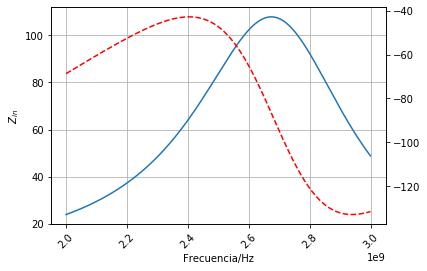

(50.6772401692293+0.12254004617935266j)


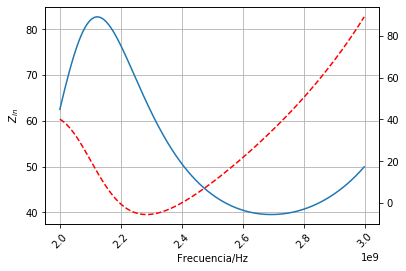

wo= 1.5080e+10
Ra= 6.4010e+01
Ca= 1.5505e-12
Qm1= 6.68e-01
Rap= 9.2587e+01 ohms
Cap= 4.7857e-13 F
La= 9.1892e-09 Hy
Qm2= 9.2290e-01
Lb= 6.6528e-09 Hy
Lp 3.8590e-09 Hy
Lbs 3.0601e-09 Hy
Cs= 1.4371e-12 F


In [5]:
freq = np.array([2305e6,2440e6, 2635e6])
RLa  = np.array([-10.051,-13.020,-10.157])

G      = 10**(RLa/10)  
Z      = 50*(1+G)/(1-G)
GG     = (Z-50)/(Z+50)
RR     = 10*np.log10(GG)



Rant  = 90
Lant  = 23e-9
Cants = 0.2e-12
Cantp = 0.6e-12

f =  np.arange(2e9,3e9,1e6)                   # Defino el array de frecuencia
w =  2*np.pi*f
wo = 2.4e9*2*np.pi
print(f[400])


Zants = (Rant + 1j*w*Lant+ 1/(1j*w*Cants) )
Zant  = 1/(1j*w*Cantp + 1/Zants)



Gant = (Zant - 50)/(Zant+50)
RLant = 10*np.log10(Gant)

print(Zant[400])
myp.PlotCpx(f,Zant , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')
plt.show()

Lad  = 3.9e-9  
QLa  = 45
ZLad = 1j*w*Lad + w*Lad/QLa

Cad  = 1.5e-12
QCa  = 150e9
rsCa = 1/(QCa*w*Cad)
XCa  = 1/(1j*w*Cad) 
ZCad = XCa + rsCa

Zi = 1/(1/(ZLad) + 1/(Zant)) + ZCad
print(Zi[400])
myp.PlotCpx(f,Zi , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')
plt.show()


print('wo= {:1.4e}'.format(wo) )
Zo = 50
Ra = Zant[400].real
Ca = -1/(Zant[400].imag*wo)

print('Ra= {:1.4e}'.format(Ra) )
print('Ca= {:1.4e}'.format(Ca) )

Qm1 = 1/(Ra*wo*Ca)
print('Qm1= {:1.2e}'.format(Qm1) )


Rap = Ra*(1+Qm1**2)
Cap = Ca/(1+1/Qm1**2)
print('Rap= {:1.4e} ohms'.format(Rap) )
print('Cap= {:1.4e} F'.format(Cap) )


La = 1/(Cap*wo**2)
print('La= {:1.4e} Hy'.format(La) )

Qm2 = (Rap/Zo - 1)**0.5
print('Qm2= {:1.4e}'.format(Qm2) )


Lb = Rap/(wo*Qm2)
print('Lb= {:1.4e} Hy'.format(Lb) )

Lp = La*Lb/(La+Lb)
print('Lp {:1.4e} Hy'.format(Lp) )

Lbs = Lb/(1+1/Qm2**2)
print('Lbs {:1.4e} Hy'.format(Lbs) )
Cs  = 1/(Lbs*wo**2)
print('Cs= {:1.4e} F'.format(Cs) )

 

# Ejercicio 5 filtro PI




El siguiente ejercicio tiene como objetivo realizar el calculo de los los adaptadores para un amplificador de $150 W$ de potencia de RF a la frecuencia de $f_o = 100 MHz$. 

Para este amplificador vamos a emplear el MOSFET BLF177 fabricado por la empresa Ampleon.

Este dispositivo fue diseñado como dispotivo activo solido para amplificador de potencia para servicios comerciales como FM o TV.


Se emplea como base el diseño propouesto en la hojas de datos, el cual se muestra a continuación. 
https://www.ampleon.com/documents/data-sheet/BLF177_N.pdf

El diseño se basa en la recomiendación de la nota de aplicación AN282 de Motorola (NXP) disponible en internet : https://www.nxp.com/docs/en/application-note/AN282A.pdf 
 
Tambien se puede consultar: https://www.nxp.com/docs/en/application-note/AN1526.pdf 
 
Principio de funcionamiento.

Los amplificador sintonizados operan con señales periodicas con un ancho de banda asociado. Tipicamente, se utilizan para amplificar una señal portadora modulada. 

Para ilustrar el funcionamiento, supongamos que empleamos como exitación un tono de señal portadora, en este ejemplo sera de $f_o = 100 MHz$. 
El amplificador esta diseñado para operar en Clase AB, Clase B o Clase C, dependiendo del ángulo de circulación de la señal a la salida. 
Por ejemplo, suponiendo que el amplificador opera en Clase B, los pulsos de corriente de la fuente de salida corresponderan unicamente a parte positiva de la entrada (angulo de circulación de 180 grados).
Estos pulsos de corrientes tiene un espectro en frecuencia conformado principalmente por una señal fundamental de $100 MHz$ y sus armonicos. 
Si logramos atenuar los armonicos que conforman el pulso de corriente, obtenemos nuevamente la señal fundamental. Esto se logra empleando filtros LC.
La reduccuión del angulo de circulación mejora el rendimiento pero al mismo tiempo produce armonicos de mayor intensidad que deben ser atenuados para recomponener la señal portadora modulada. Esto exige filtros de salida mas selectivos. 


Los MOSFET para el el amplificador que estamos proyectando deben operar en cirtos margenes de tensión.
Para este transistor, $V_{DSmin} \ge 10 V$ y $V_{(BR)DSS} \ge 125 V$. 
Dado que se busca una señal alterna a la salida del transistor, la tensión de DC del DRAIN permite la excursión de la señal alterna de $f_o = 108 MHz$, desde $V_{DD}$ (tensión de la fuente) hasta $V_{DSMIN}$. Esta excursión de la señal se logra conectando a la fuente de corriente $g_{ds}$ una resistencia de valor adecuado. 
Entonces, los pulsos de corriente producen sobre la resistencia una señal alterna de tensión a la frecuencia de sintonia. Cuando la fuente no entregue corriente (semiciclo negativo de la señal de entrada), es  el circuito resonador el que mantiene la osciladción a la frecuencia de resonancia. 

En este proyecto, la tensión de fuente en el DRAIN es de $V_{DD} = 50 V$.


La resistencia total con que se debe cargar a la fuente $g_{ds}$ entonces se calcula como:

$$Rt = \frac{(V_{DD})^2}{2 P_o}$$

Recordemos que estamos proyectando un amplificador de $P_o = 150 Watt$ (RMS). 

$$Rt  = 8.3 \Omega$$

Dado que el MOSFET presenta una capacidad, esta resistencia se emplea para frecuencias bajas (donde la capacidad de salida sea despreciable). Para frecuencias mayores, esta resistencia debe ser menor para compensar los efectos de la capacidad.

![ejercicio5impedancias](fig/ejercicio5c.png)

De la hoja de datos podemos obtener la impedancia de entrada y de salida del amplificador que debemos presentarle al MOSFET a la frecuencia de trabajo. Dada la alta frecuencia este valor difiere del calculado debido a las capacidades del dispositivo. 

A la frecuencia de trabajo $f_o = 108 MHz$

$$Z_{in} = (1.5 - 1.8j) \Omega$$ 

$$Z_{L}  = (2.5 + 3.0j) \Omega$$ 


Para este diseño empleamos el circuito propuesto por el fabricante, el cual se muestra a continuación. En el circuito se identificaron los filtros que debemos calcular.

![ejercicio5circuito](fig/ejercicio5d.png)

Según se especifica en la hoja de datos, se deben emplear striplines (lineas de trasmisión que se asemejan a un indictor) a la entrada y a la salida del MOSFET. Estos inductores se midieron en el pograma de simulaciones QUCs. Para el calculo se emplea el sustratro ROGER R5880. A continuación se mustra el resultado:

![ejercicio5stripline](fig/ejercicio5impe.png)

$$Z_{in}(108MHz) = (1.475 - 441.4j) \Omega$$ 


$$Z_{L}(108MHZ)  = (1.87 + 847.3j) \Omega$$ 


Valores de los componentes:


$$C6, C7, C9, C10 = 1 nF (Cap.acople)$$ 


Adaptador entrada:

$$C1 = C2 = 3.5 a 25 pF(Trimmer\ variable\ ARCO42)$$ 

$$C3 = 20 pF$$

$$C4 = C5 = 62 pF$$

$$L1 = 22 nHy$$


Filtro salida:

$$C13 = C14 =  36 pF$$

$$C15 = 12 pF$$

$$C16 = C18 =  3.5 a 25 pF(Trimmer\ variable\ ARCO42)$$

$$L8  = 34.4nHy$$

Calcular.

1. Del adaptador de entrada $C1$ para la frecuecia de $fo= 108MHz$$

2. Del adaptador de entrada $C2$ para la frecuecia de $fo= 108MHz$$, Verificar usando simuladores.

3. Del filtro de entrada $C16$ para la frecuecia de $fo= 108MHz$$

4. Del filtro de entrada $C18$ para la frecuecia de $fo= 108MHz$$, Verificar usando simuladores.

5. Suponiendo que el pico de la señal altena de en el Drain es de $V_{DS}(108MHz) = 50 V$, calcular la tensión en $R_L = 50 \Omega$. Verificar usando simuladores.

6. Suponiendo que el pico de la señal altena de en el Drain es de $V_{DS}(108MHz) = 50 V$, calcular la potencia en $R_L = 50 \Omega$

Para el mismo circuito, pero se desea trasmitir una señal de $f_o = 100MHz$. La nueva impedancia desde el GATE hasta $L2$ (incluida) $Z_{io}= 1.42 + j5.36) \Omega$ y la nueva impedancia desde el DRAIN hasta $L7$ (incluida) $Z_{lo} = 3.17 + j8.17) \Omega$    

7. Del adaptador de entrada $C1$ para la frecuecia de $fo= 100MHz$$

8. Del adaptador de entrada $C2$ para la frecuecia de $fo= 100MHz$$, Verificar usando simuladores..

9. Del filtro de entrada $C16$ para la frecuecia de $fo= 100MHz$$

10. Del filtro de entrada $C18$ para la frecuecia de $fo= 100MHz$$, Verificar usando simuladores.





In [21]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Datos 
Zo     = 50
f      = np.array([      40e6,      60e6,    80e6,     100e6,     108e6])
Zado   = np.array([(2.2-3.5j),(1.8-2.5j),(1.5-2.0j),(1.5-1.8j),(1.5-1.8j)])
Zl     = np.array([(7.2+3.7j),(5.5+4.2j),(4.2+3.8j),(3.0+3.5j),(2.8+3.3j)])


indice = 4
### Entrada

C3  = 20.0e-12
C4  = 62.0e-12
C5  = 62.0e-12
L1  = 22.0e-9
L2  = 10.1e-9
L3  =  1.2e-9
Rgs = 15.0

fo   = f[indice]
print(fo)
wo   = 2*np.pi*fo


Z3  = 1j*wo*L3
Z2  = 1j*wo*L2
Z45 = 1/(1j*wo*(C4+C5))
Z1  = 1j*wo*L1


Zi  = Zado[indice]
print('ri ={} ohms'.format(Zi.real) )
print('ci ={} pF'.format(-1/(Zi.imag*wo)/1e-12) )

Za  = Z2+( (Z3+Zi)*Rgs)/((Zi+Z3)+Rgs)
print('ra ={} ohms'.format(Za.real) )
print('xa ={} ohms'.format(Za.imag) )


Zb  = Z45*Za/(Z45+Za)



Zc  = Z1+Zb
print('rc ={} ohms'.format(Zc.real) )
print('xc ={} ohms'.format(Zc.imag) )


rc  = Zc.real
xc  = Zc.imag
Qm1 = abs(xc)/rc

rcp  = rc*(1+Qm1**2)
xcp  = xc*(1+1/Qm1**2)
print('rcp ={} ohms'.format(rcp) )
print('xcp ={} ohms'.format(xcp) )


Qm2  = ((rcp/Zo.real)-1)**0.5

# xcc positiva por ser inductiva (para que la conversion 
xcc  =  rcp/Qm2
print(xcc)

# 1/xcc = -1/xC23 + 1/xcp
xC23 = -1/(1/xcc -1/xcp)

# xC23 es negativo por ser capacitivo
C23  = 1/(xC23*wo)

# conversión xcc a serie 
xccp  = xcc/(1+1/Qm2**2)

xC1  = -xccp
# Capacitor de sintonia
C1   = -1/(xC1*wo) 
print('C1 ={} pF'.format(C1/1e-12) )

C2 = C23-C3
print('C3+C2 ={} pF'.format(C23/1e-12) )
print('C2 ={} pF'.format(C2/1e-12) )




108000000.0
ri =1.5 ohms
ci =818.698266933618 pF
ra =1.4121286133904885 ohms
xa =6.041968003334936 ohms
rc =5.5206239256463085 ohms
xc =25.884847283855763 ohms
rcp =126.88830408873476 ohms
xcp =27.062265415560447 ohms
102.32375145964505
C1 =23.76737579684794 pF
C3+C2 =40.052401601711196 pF
C2 =20.052401601711196 pF


In [22]:
### Salida
indice = 4
fo   = f[indice]
print(fo)
wo   = 2*np.pi*fo

Zlo  = Zl[indice].real - 1j*Zl[indice].imag 
print('ro ={} ohms'.format(Zlo.real) )
print('co ={} pF'.format(-1/(Zlo.imag*wo)/1e-12) )



L4   =  1.3e-9 
L5   =122.0e-9 
L7   = 16.5e-9

C13  = 36.0e-12
C14  = 36.0e-12

L8   = 34.4e-9

C15  = 12.0e-12
C16  = 2.5e-12  # 2 a 20e-12

C17  =  5.6e-12
C18  = 12.0e-12 # 2 a 20e-12




Z4   = 1j*wo*L4
Z5   = 1j*wo*L5
Z7   = 1j*wo*L7
Z34  = 1/(1j*wo*(C13+C14)) 
Z8   = 1j*wo*L8
Z56  = 1/(1j*wo*(C15+C16))  # 12.0e-12 + (2 a 20e-12)
Z78  = 1/(1j*wo*(C17+C18))  #  5.6e-12 + (2 a 20e-12)



Za  = Z7+ ((Z4+Zlo)*Z5)/((Z4+Zlo)+Z5)
print('ra ={} ohms'.format(Za.real) )
print('xa ={} ohms'.format(Za.imag) )


Zb  = Z34*Za/(Z34+Za)


Zc  = Z8+Zb
print('rc ={} ohms'.format(Zc.real) )
print('xc ={} ohms'.format(Zc.imag) )


rc  = Zc.real
xc  = Zc.imag
Qm1 = abs(xc)/rc

rcp  = rc*(1+Qm1**2)
xcp  = xc*(1+1/Qm1**2)
print('rcp ={} ohms'.format(rcp) )
print('xcp ={} ohms'.format(xcp) )


Qm2  = ((rcp/Zo.real)-1)**0.5

# xcc positiva por ser inductiva (para que la conversion 
xcc  =  rcp/Qm2
print(xcc)

# 1/xcc = -1/xC23 + 1/xcp
x56 =  1/(1/xcc -1/xcp)

# xC23 es negativo por ser capacitivo
C56  = -1/(x56*wo)

# conversión xcc a serie 
xccp  = xcc/(1+1/Qm2**2)

x78  = -xccp
# Capacitor de sintonia
C78   = -1/(x78*wo) 
print('C17+C18 ={} pF'.format(C78/1e-12) )

C18   = C78 - C17
print('C18 ={} pF'.format(C18/1e-12) )
C16   = C56 - C15
print('C15+C16 ={} pF'.format(C56/1e-12) )
print('C16 ={} pF'.format(C16/1e-12) )

108000000.0
ro =2.8 ohms
co =446.56269105470074 pF
ra =2.9674033396621473 ohms
xa =8.809438627445255 ohms
rc =8.589960954332893 ohms
xc =36.62315666441489 ohms
rcp =164.7321845566101 ohms
xcp =38.63793190274544 ohms
108.74788731408741
C17+C18 =19.4566802849691 pF
C18 =13.8566802849691 pF
C15+C16 =24.58902824527973 pF
C16 =12.589028245279732 pF


In [23]:
######### 100 MHz
indice = 3
### Entrada

C3  = 20.0e-12
C4  = 62.0e-12
C5  = 62.0e-12
L1  = 22.0e-9
L2  = 10.1e-9
L3  =  1.2e-9
Rgs = 15.0

fo   = f[indice]
print(fo)
wo   = 2*np.pi*fo


Z3  = 1j*wo*L3
Z2  = 1j*wo*L2
Z45 = 1/(1j*wo*(C4+C5))
Z1  = 1j*wo*L1


Zi  = Zado[indice]
print('ri ={} ohms'.format(Zi.real) )
print('ci ={} pF'.format(-1/(Zi.imag*wo)/1e-12) )

Za  = Z2+( (Z3+Zi)*Rgs)/((Zi+Z3)+Rgs)
print('ra ={} ohms'.format(Za.real) )
print('xa ={} ohms'.format(Za.imag) )


Zb  = Z45*Za/(Z45+Za)



Zc  = Z1+Zb
print('rc ={} ohms'.format(Zc.real) )
print('xc ={} ohms'.format(Zc.imag) )


rc  = Zc.real
xc  = Zc.imag
Qm1 = abs(xc)/rc

rcp  = rc*(1+Qm1**2)
xcp  = xc*(1+1/Qm1**2)
print('rcp ={} ohms'.format(rcp) )
print('xcp ={} ohms'.format(xcp) )


Qm2  = ((rcp/Zo.real)-1)**0.5

# xcc positiva por ser inductiva (para que la conversion 
xcc  =  rcp/Qm2
print(xcc)

# 1/xcc = -1/xC23 + 1/xcp
xC23 = -1/(1/xcc -1/xcp)

# xC23 es negativo por ser capacitivo
C23  = 1/(xC23*wo)

# conversión xcc a serie 
xccp  = xcc/(1+1/Qm2**2)

xC1  = -xccp
# Capacitor de sintonia
C1   = -1/(xC1*wo) 
print('C1 ={} pF'.format(C1/1e-12) )

C2 = C23-C3
print('C3+C2 ={} pF'.format(C23/1e-12) )
print('C2 ={} pF'.format(C2/1e-12) )




100000000.0
ri =1.5 ohms
ci =884.1941282883075 pF
ra =1.4182205579643987 ohms
xa =5.485000035924237 ohms
rc =4.1694766738651925 ohms
xc =22.596679528704883 ohms
rcp =126.63326905422744 ohms
xcp =23.366019807741107 ohms
102.2878721869694
C1 =25.711443127851105 pF
C3+C2 =52.55433157211911 pF
C2 =32.55433157211912 pF


In [24]:
### Salida
indice = 3
fo   = f[indice]
print(fo)
wo   = 2*np.pi*fo

Zlo  = Zl[indice].real - 1j*Zl[indice].imag 
print('ro ={} ohms'.format(Zlo.real) )
print('co ={} pF'.format(-1/(Zlo.imag*wo)/1e-12) )



L4   =  1.2e-9 
L5   =122.0e-9 
L7   = 16.5e-9

C13  = 36.0e-12
C14  = 36.0e-12

L8   = 34.4e-9

C15  = 12.0e-12
C16  = 12.0e-12  # 3.5 a 25e-12

C17  =  5.6e-12
C18  = 12.0e-12 #3.5 a 25e-12




Z4   = 1j*wo*L4
Z5   = 1j*wo*L5
Z7   = 1j*wo*L7
Z34  = 1/(1j*wo*(C13+C14)) 
Z8   = 1j*wo*L8
Z56  = 1/(1j*wo*(C15+C16))  # 12.0e-12 + (2 a 20e-12)
Z78  = 1/(1j*wo*(C17+C18))  #  5.6e-12 + (2 a 20e-12)



Za  = Z7+ ((Z4+Zlo)*Z5)/((Z4+Zlo)+Z5)
print('ra ={} ohms'.format(Za.real) )
print('xa ={} ohms'.format(Za.imag) )


Zb  = Z34*Za/(Z34+Za)


Zc  = Z8+Zb
print('rc ={} ohms'.format(Zc.real) )
print('xc ={} ohms'.format(Zc.imag) )


rc  = Zc.real
xc  = Zc.imag
Qm1 = abs(xc)/rc

rcp  = rc*(1+Qm1**2)
xcp  = xc*(1+1/Qm1**2)
print('rcp ={} ohms'.format(rcp) )
print('xcp ={} ohms'.format(xcp) )


Qm2  = ((rcp/Zo.real)-1)**0.5

# xcc positiva por ser inductiva (para que la conversion 
xcc  =  rcp/Qm2
print(xcc)

# 1/xcc = -1/xC23 + 1/xcp
x56 =  1/(1/xcc -1/xcp)

# xC23 es negativo por ser capacitivo
C56  = -1/(x56*wo)

# conversión xcc a serie 
xccp  = xcc/(1+1/Qm2**2)

x78  = -xccp
# Capacitor de sintonia
C78   = -1/(x78*wo) 
print('C17+C18 ={} pF'.format(C78/1e-12) )

C18   = C78 - C17
print('C18 ={} pF'.format(C18/1e-12) )
C16   = C56 - C15
print('C15+C16 ={} pF'.format(C56/1e-12) )
print('C16 ={} pF'.format(C16/1e-12) )

100000000.0
ro =3.0 ohms
co =454.7284088339867 pF
ra =3.2217578413783388 ohms
xa =7.649985026983844 ohms
rc =7.17768029494938 ohms
xc =31.7129730574772 ohms
rcp =147.2943501404914 ohms
xcp =33.33751624751903 ohms
105.59109169313389
C17+C18 =22.81872206693965 pF
C18 =17.218722066939648 pF
C15+C16 =32.66772975036952 pF
C16 =20.667729750369514 pF


In [10]:
import math
import cmath 
import numpy as np
import matplotlib.pyplot as plt
from skrf import Network, Frequency
import mysmith as mys
import myplot as myp


  

    
MRF173 = Network('./POWER_RF_prj/MRF173.s2p')

freq = Frequency(130,170,5,'mhz')

fo = np.arange(130e6,170e6,10e6)
wo = 2*np.pi*fo

Y1 = MRF173['{}Mhz'.format(150)].y[0]

y11 =   Y1[0,0]
y12 =   Y1[0,1]
y21 =   Y1[1,0]
y22 =   Y1[1,1]
 
yin  = y11 - (y21*y12)/(y22+yl)
yg   = y11.real  -  1j*y11.imag    



yout = y22 - (y21*y12)/(y11+yg)

NameError: name 'yl' is not defined